In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df_ = pd.read_csv("/Users/haticecoban/Downloads/healthy_lifestyle_city_2021.csv", delimiter=",")

In [3]:
df = df_.copy()
df.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


In [ ]:
# About Dataset
# Healthy lifestyle metrics of top 44 cities.

### Sunshine hours(City)
### Cost of a bottle of water(City)
### Obesity levels(Country)
### Life expectancy(years) (Country)
### Pollution(Index score) (City)
### Annual avg. hours worked
### Happiness levels(Country)
### Outdoor activities(City)
### Number of take out places(City)
### Cost of a monthly gym membership(City)

In [4]:
df.info

<bound method DataFrame.info of                 City  Rank Sunshine hours(City)  \
0          Amsterdam     1                 1858   
1             Sydney     2                 2636   
2             Vienna     3                 1884   
3          Stockholm     4                 1821   
4         Copenhagen     5                 1630   
5           Helsinki     6                 1662   
6            Fukuoka     7                 2769   
7             Berlin     8                 1626   
8          Barcelona     9                 2591   
9          Vancouver    10                 1938   
10         Melbourne    11                 2363   
11           Beijing    12                 2671   
12           Bangkok    13                 2624   
13      Buenos Aires    14                 2525   
14           Toronto    15                 2066   
15            Madrid    16                 2769   
16           Jakarta    17                 2983   
17             Seoul    18                 2066   

In [5]:
df.shape

(44, 12)

In [6]:
df.columns

Index(['City', 'Rank', 'Sunshine hours(City)',
       'Cost of a bottle of water(City)', 'Obesity levels(Country)',
       'Life expectancy(years) (Country)', 'Pollution(Index score) (City)',
       'Annual avg. hours worked', 'Happiness levels(Country)',
       'Outdoor activities(City)', 'Number of take out places(City)',
       'Cost of a monthly gym membership(City)'],
      dtype='object')

In [7]:
df.isnull().sum()

City                                      0
Rank                                      0
Sunshine hours(City)                      0
Cost of a bottle of water(City)           0
Obesity levels(Country)                   0
Life expectancy(years) (Country)          0
Pollution(Index score) (City)             0
Annual avg. hours worked                  0
Happiness levels(Country)                 0
Outdoor activities(City)                  0
Number of take out places(City)           0
Cost of a monthly gym membership(City)    0
dtype: int64

In [8]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')

In [13]:
#################### Data set hakkında genel kısa bilgiler ####################

def check_df(df, head=5, tail=5):
    print(" SHAPE ".center(60, '~'))
    print('Observations -------> {}'.format(df.shape[0]))
    print('Features     -------> {}'.format(df.shape[1]))
    print("Shape of dataset: {df.shap)}")
    print(" Types of Features ".center(60, '~'))
    print(df.dtypes, "\n")
    print(" Dataframe - Head ".center(60, '~'))
    print("\n", df.head(head), "\n")
    print(' Dataframe - TAIL '.center(60, '~'))
    print("\n", df.tail(tail), "\n")
    print(" Missing Values Analysis ".center(60, '~'))
    print("\n", df.isnull().sum(), "\n")
    print(' Duplicate Values Analysis '.center(60, '~'))
    print("\n", df.duplicated().sum(), "\n")
    print(" QUANTILES ".center(60, '~'))
    print("\n", df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T, "\n")

In [14]:
check_df(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~ SHAPE ~~~~~~~~~~~~~~~~~~~~~~~~~~~
Observations -------> 44
Features     -------> 12
Shape of dataset: {df.shap)}
~~~~~~~~~~~~~~~~~~~~ Types of Features ~~~~~~~~~~~~~~~~~~~~~
city                                       object
rank                                        int64
sunshine_hours(city)                       object
cost_of_a_bottle_of_water(city)            object
obesity_levels(country)                    object
life_expectancy(years)_(country)          float64
pollution(index_score)_(city)              object
annual_avg._hours_worked                   object
happiness_levels(country)                 float64
outdoor_activities(city)                    int64
number_of_take_out_places(city)             int64
cost_of_a_monthly_gym_membership(city)     object
dtype: object 

~~~~~~~~~~~~~~~~~~~~~ Dataframe - Head ~~~~~~~~~~~~~~~~~~~~~

          city  rank sunshine_hours(city) cost_of_a_bottle_of_water(city)  \
0   Amsterdam     1                 1858    

In [9]:
df.head(10)

,city,rank,sunshine_hours(city),cost_of_a_bottle_of_water(city),obesity_levels(country),life_expectancy(years)_(country),pollution(index_score)_(city),annual_avg._hours_worked,happiness_levels(country),outdoor_activities(city),number_of_take_out_places(city),cost_of_a_monthly_gym_membership(city)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04


In [11]:
df.dtypes

city                                       object
rank                                        int64
sunshine_hours(city)                       object
cost_of_a_bottle_of_water(city)            object
obesity_levels(country)                    object
life_expectancy(years)_(country)          float64
pollution(index_score)_(city)              object
annual_avg._hours_worked                   object
happiness_levels(country)                 float64
outdoor_activities(city)                    int64
number_of_take_out_places(city)             int64
cost_of_a_monthly_gym_membership(city)     object
dtype: object

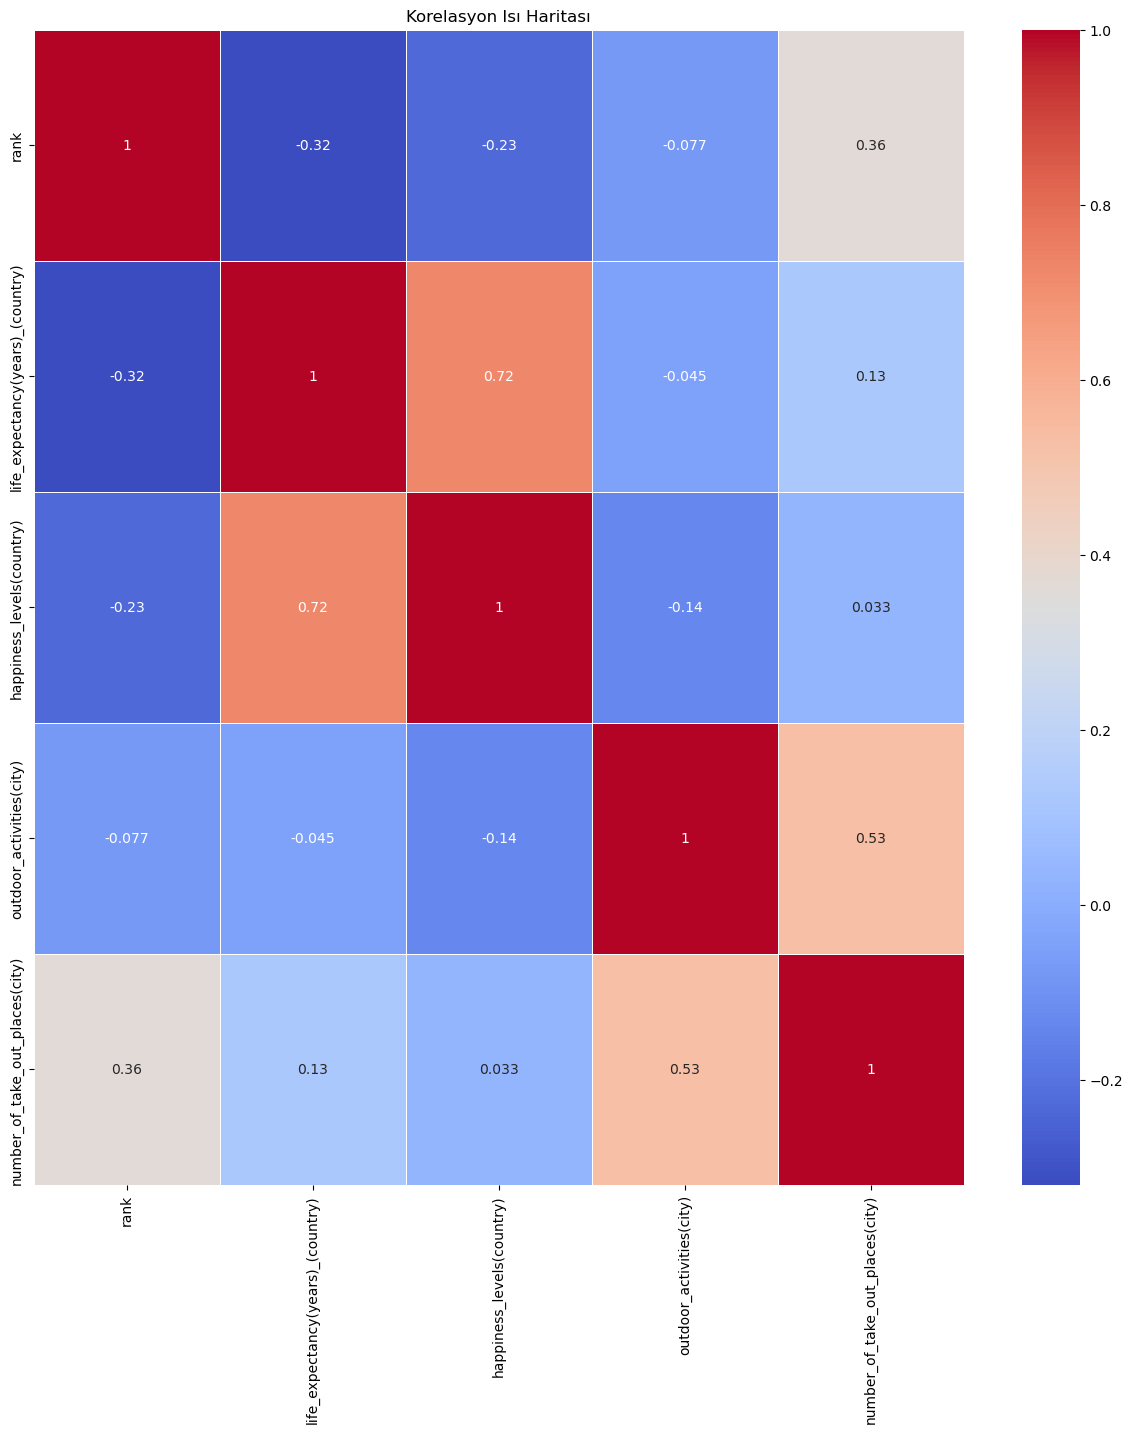

In [10]:
correlation_matrix = df.corr() 
# korelasyon matrisi, veri setindeki sayısal sütunlar arasındaki ilişkileri anlamak ve analiz etmek için.
# Korelasyon ısı haritası
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Korelasyon Isı Haritası")
plt.show()

In [12]:
#################### Değişkenlerin value_counts bilgileri ####################

for i in df.columns:
    print(df[i].value_counts())
    print('***************************************\n')

Amsterdam           1
Sydney              1
Los Angeles         1
Mumbai              1
Boston              1
Dublin              1
Tokyo               1
Chicago             1
Hong Kong           1
Shanghai            1
Brussels            1
San Francisco       1
Paris               1
Sao Paulo           1
Zurich              1
London              1
Johannesburg        1
Milan               1
Washington, D.C.    1
New York            1
Moscow              1
Taipei              1
Cairo               1
Istanbul            1
Melbourne           1
Vienna              1
Stockholm           1
Copenhagen          1
Helsinki            1
Fukuoka             1
Berlin              1
Barcelona           1
Vancouver           1
Beijing             1
Tel Aviv            1
Bangkok             1
Buenos Aires        1
Toronto             1
Madrid              1
Jakarta             1
Seoul               1
Frankfurt           1
Geneva              1
Mexico City         1
Name: city, dtype: int64
*******

# DATA VISUALIZATION

In [18]:
#Top 10 Healthiest Cities 

print(df['city'][:10])

0     Amsterdam
1        Sydney
2        Vienna
3     Stockholm
4    Copenhagen
5      Helsinki
6       Fukuoka
7        Berlin
8     Barcelona
9     Vancouver
Name: city, dtype: object


In [24]:
df.columns

Index(['city', 'rank', 'sunshine_hours(city)',
       'cost_of_a_bottle_of_water(city)', 'obesity_levels(country)',
       'life_expectancy(years)_(country)', 'pollution(index_score)_(city)',
       'annual_avg._hours_worked', 'happiness_levels(country)',
       'outdoor_activities(city)', 'number_of_take_out_places(city)',
       'cost_of_a_monthly_gym_membership(city)'],
      dtype='object')

In [31]:
# Top 10 Countries with Highest Life Expectancy Rate

df.groupby(df["city"]).agg({"life_expectancy(years)_(country)":"mean"}).head(10)

,life_expectancy(years)_(country)
city,
Amsterdam,81.2
Bangkok,74.1
Barcelona,82.2
Beijing,75.4
Berlin,80.6
Boston,78.8
Brussels,80.4
Buenos Aires,75.9
Cairo,70.7


In [105]:
# Top 10 Countries with Highest Happiness Levels Rate

df.groupby(df["city"]).agg({"happiness_levels(country)":"max"}).head(10)

,happiness_levels(country)
city,
Amsterdam,7.44
Bangkok,5.99
Barcelona,6.40
Beijing,5.12
Berlin,7.07
Boston,6.94
Brussels,6.86
Buenos Aires,5.97
Cairo,4.15


In [103]:
happiest_city=df[['happiness_levels(country)','city']].sort_values(by='happiness_levels(country)',ascending=False).head(7)

In [111]:
happiest_city

,happiness_levels(country),city
5,7.80,Helsinki
4,7.64,Copenhagen
36,7.56,Zurich
19,7.56,Geneva
0,7.44,Amsterdam
3,7.35,Stockholm
2,7.29,Vienna


<AxesSubplot:xlabel='city', ylabel='happiness_levels(country)'>

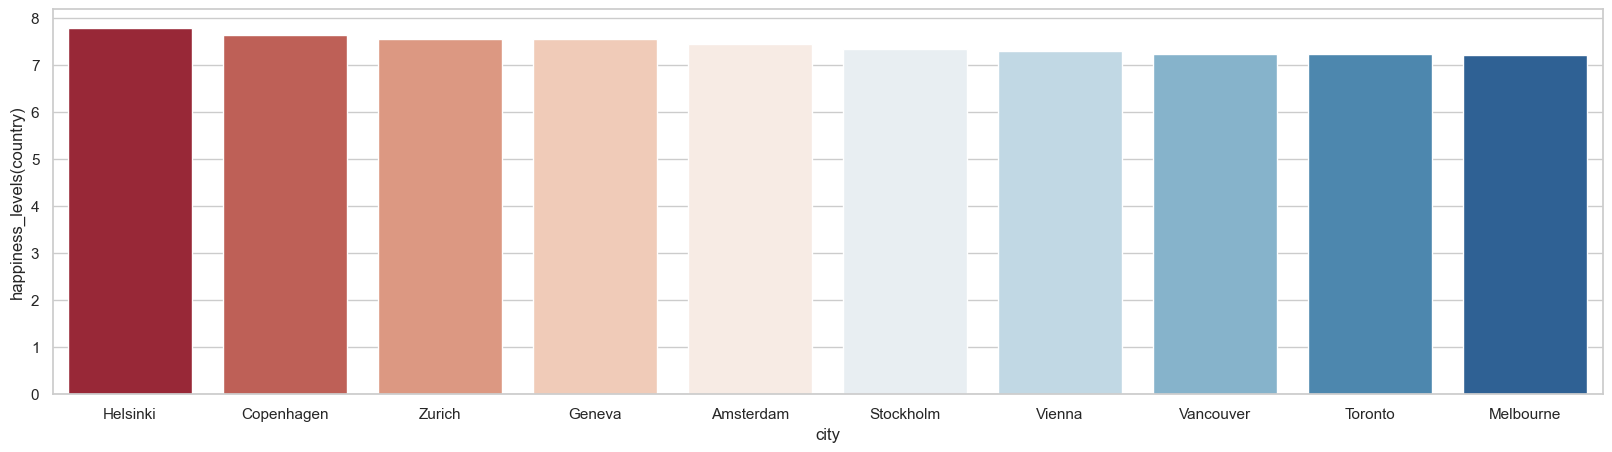

In [102]:
temp=df.sort_values(by='happiness_levels(country)',ascending=False).head(10)
plt.figure(figsize=(20,5))

sns.barplot(data=temp, x='city',y='happiness_levels(country)',palette='RdBu')

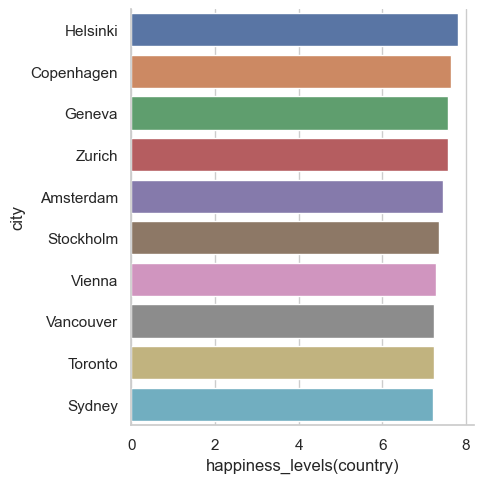

In [107]:
# The correletion between Happiness level and Cities
sns.catplot(x="happiness_levels(country)", y="city", kind="bar", data=df.nlargest(10, 'happiness_levels(country)'));

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,44.0,22.500000,12.845233,1.00,11.75,22.5,33.250,44.0
life_expectancy(years)_(country),44.0,78.175000,5.304370,56.30,75.40,80.4,81.800,83.2
happiness_levels(country),44.0,6.435000,0.991202,3.57,5.87,6.9,7.175,7.8
outdoor_activities(city),44.0,213.977273,127.190297,23.00,125.25,189.5,288.250,585.0
number_of_take_out_places(city),44.0,1443.113636,1388.803270,250.00,548.00,998.0,1674.250,6417.0


In [57]:
df.columns

Index(['city', 'rank', 'sunshine_hours(city)',
       'cost_of_a_bottle_of_water(city)', 'obesity_levels(country)',
       'life_expectancy(years)_(country)', 'pollution(index_score)_(city)',
       'annual_avg._hours_worked', 'happiness_levels(country)',
       'outdoor_activities(city)', 'number_of_take_out_places(city)',
       'cost_of_a_monthly_gym_membership(city)'],
      dtype='object')

In [96]:
highest_ob_city=df[['obesity_levels(country)','city']].sort_values(by='obesity_levels(country)',ascending=False).head(7)
low_ob_city=df[['obesity_levels(country)','city']].sort_values(by='obesity_levels(country)',ascending=False).head(7)

In [97]:
low_ob_city

,obesity_levels(country),city
16,6.90%,Jakarta
31,6.20%,Shanghai
30,6.20%,Hong Kong
23,6.20%,Taipei
11,6.20%,Beijing
17,4.70%,Seoul
6,4.30%,Fukuoka


In [98]:
highest_ob_city

,obesity_levels(country),city
16,6.90%,Jakarta
31,6.20%,Shanghai
30,6.20%,Hong Kong
23,6.20%,Taipei
11,6.20%,Beijing
17,4.70%,Seoul
6,4.30%,Fukuoka


In [65]:
df.dtypes

city                                       object
rank                                        int64
sunshine_hours(city)                       object
cost_of_a_bottle_of_water(city)            object
obesity_levels(country)                    object
life_expectancy(years)_(country)          float64
pollution(index_score)_(city)              object
annual_avg._hours_worked                   object
happiness_levels(country)                 float64
outdoor_activities(city)                    int64
number_of_take_out_places(city)             int64
cost_of_a_monthly_gym_membership(city)     object
dtype: object

<AxesSubplot:xlabel='city', ylabel='life_expectancy(years)_(country)'>

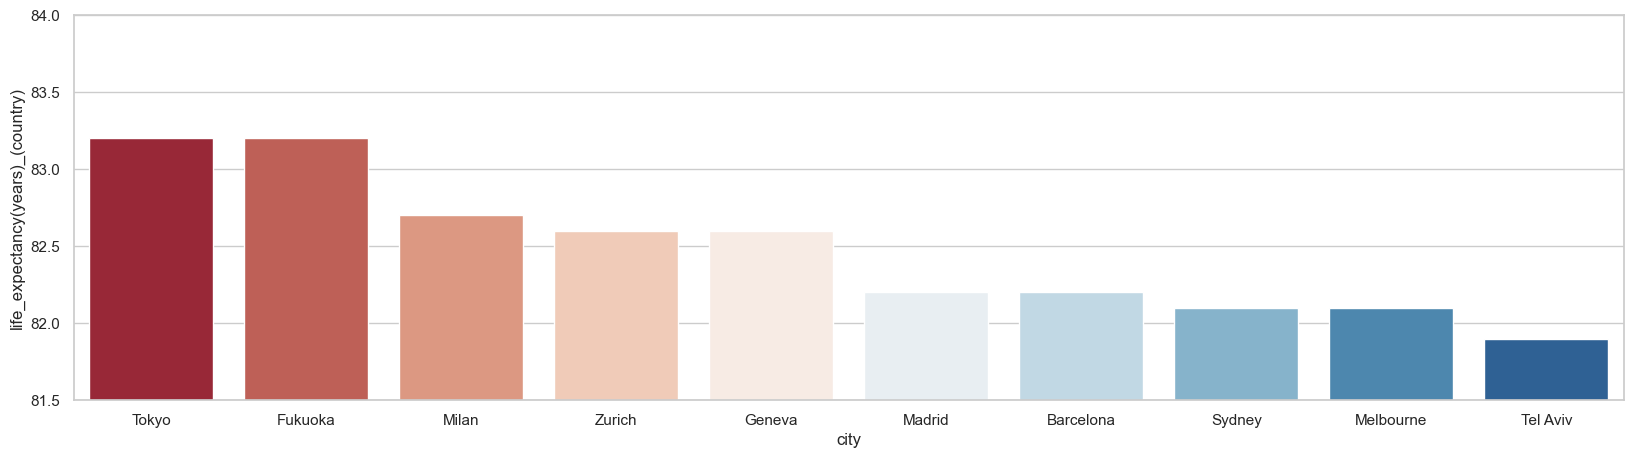

In [88]:
temp=df.sort_values(by='life_expectancy(years)_(country)',ascending=False).head(10)
plt.figure(figsize=(20,5))
plt.ylim(81.5,84)
sns.barplot(data=temp, x='city',y='life_expectancy(years)_(country)',palette='RdBu')

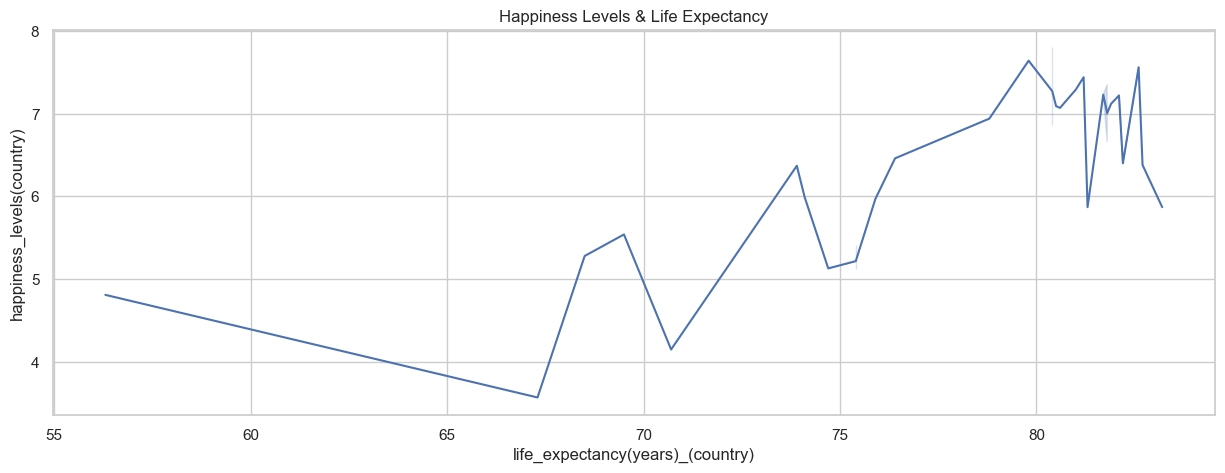

In [115]:
plt.figure(figsize=(15,5))
sns.lineplot(x='life_expectancy(years)_(country)',y='happiness_levels(country)',data=df)
plt.title('Happiness Levels & Life Expectancy')
plt.show()

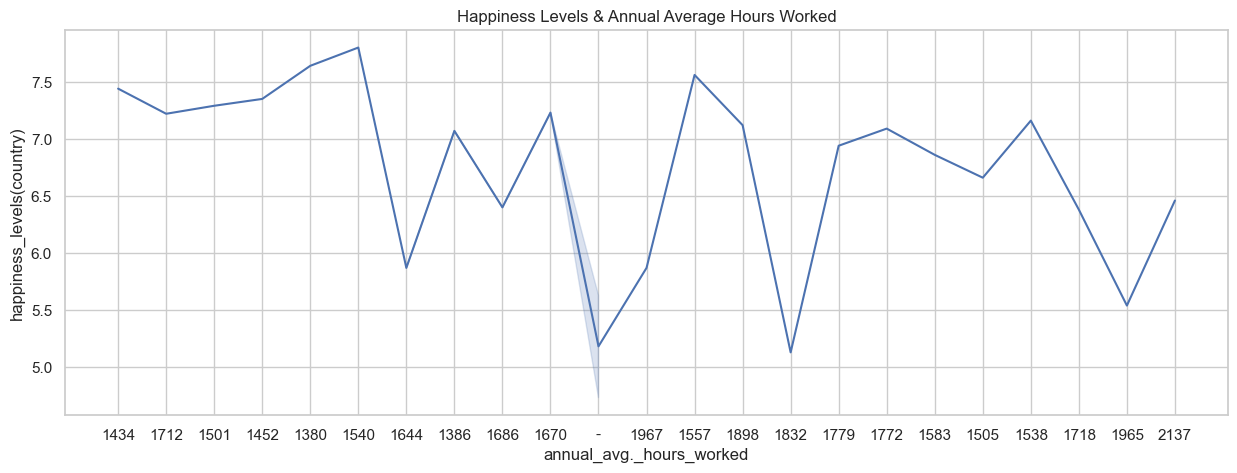

In [117]:
plt.figure(figsize=(15,5))
sns.lineplot(x='annual_avg._hours_worked',y='happiness_levels(country)',data=df)
plt.title('Happiness Levels & Annual Average Hours Worked')
plt.show()

# CLUSTERING

In [ ]:
# k-Means

In [121]:
import pandas as pd
import argparse
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
#from data_prep import *
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
#from yellowbrick.cluster import KElbowVisualizer
#from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [122]:
df.head(10)

,city,rank,sunshine_hours(city),cost_of_a_bottle_of_water(city),obesity_levels(country),life_expectancy(years)_(country),pollution(index_score)_(city),annual_avg._hours_worked,happiness_levels(country),outdoor_activities(city),number_of_take_out_places(city),cost_of_a_monthly_gym_membership(city)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04


In [123]:
df.dtypes

city                                       object
rank                                        int64
sunshine_hours(city)                       object
cost_of_a_bottle_of_water(city)            object
obesity_levels(country)                    object
life_expectancy(years)_(country)          float64
pollution(index_score)_(city)              object
annual_avg._hours_worked                   object
happiness_levels(country)                 float64
outdoor_activities(city)                    int64
number_of_take_out_places(city)             int64
cost_of_a_monthly_gym_membership(city)     object
dtype: object

In [146]:
segment_data = df[["number_of_take_out_places(city)", "life_expectancy(years)_(country)", "happiness_levels(country)"]]

In [126]:
# segment_data

23395671.377947368
9560888.42484132
4955303.616863333
2903129.1139200004
1912933.4041783335
1015040.9006941667
708018.929670303
502197.48062333337
313080.22857333336
187145.60923190473


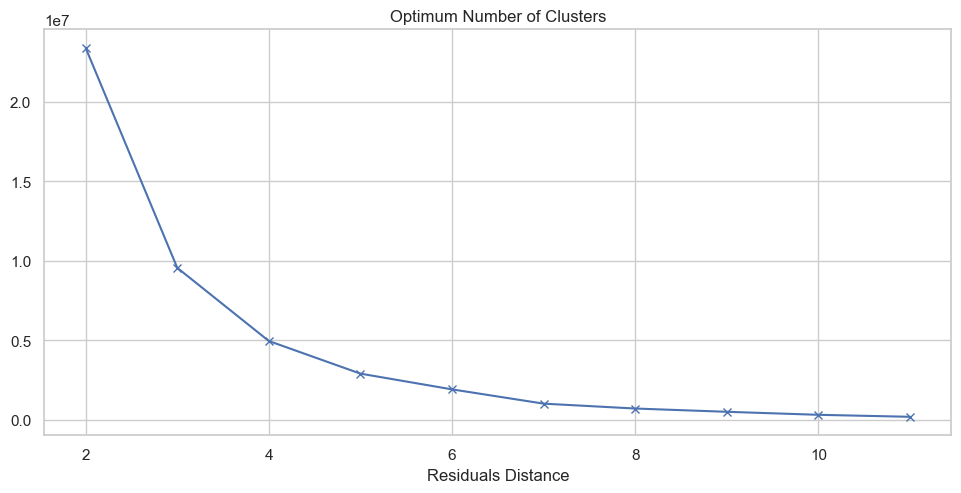

In [147]:
ssd = []
K = range(2, 12)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(segment_data)
    print(kmeans.inertia_)
    ssd.append(kmeans.inertia_)


plt.plot(K, ssd, "bx-")
plt.xlabel("Residuals Distance")
plt.title("Optimum Number of Clusters")
plt.show()

#Inertia measures how well a dataset was clustered by K-Means.
#It is calculated by measuring the distance between each data point and its centroid,
#squaring this distance, and summing these squares across one cluster.

# aşağıdaki grafiğe elbow grafiği diyoruz

In [148]:
kmeans = KMeans(n_clusters=7).fit(segment_data)

In [149]:
################################
# Final Clusters
################################
#Uyarilari Kapat
pd.options.mode.chained_assignment = None

kmeans = KMeans(n_clusters=7).fit(segment_data)
segment_data["cluster_ID"] = kmeans.labels_

In [166]:
segment_data.head()

,number_of_take_out_places(city),life_expectancy(years)_(country),happiness_levels(country),cluster_ID
0,1048,81.2,7.44,6
1,1103,82.1,7.22,6
2,1008,81.0,7.29,6
3,598,81.8,7.35,1
4,523,79.8,7.64,1


In [164]:
segment_data["cluster_ID"].value_counts()

1    15
6    12
3     8
0     3
4     3
2     2
5     1
Name: cluster_ID, dtype: int64

In [172]:
################################
# df & K-Means Joining..
################################
df["cluster_ID"] = segment_data["cluster_ID"]

In [173]:
df.head()

,city,rank,sunshine_hours(city),cost_of_a_bottle_of_water(city),obesity_levels(country),life_expectancy(years)_(country),pollution(index_score)_(city),annual_avg._hours_worked,happiness_levels(country),outdoor_activities(city),number_of_take_out_places(city),cost_of_a_monthly_gym_membership(city),cluster_ID
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90,6
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66,6
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74,6
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31,1
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53,1


In [ ]:
# Plotting the Clusters

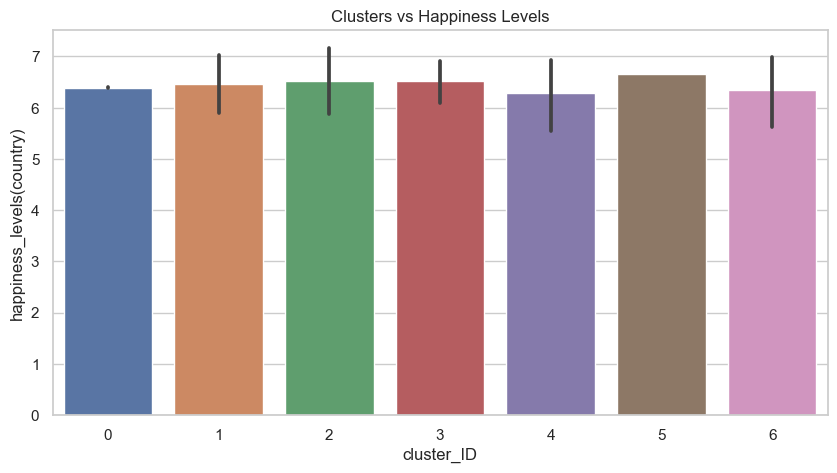

In [174]:
plt.figure(figsize=(10,5))
sns.barplot(y='happiness_levels(country)',x='cluster_ID',data=df)
plt.title('Clusters vs Happiness Levels')
plt.show()

In [181]:
#Printing the Clusters

In [186]:
print('Cluster 1:',list(df[df.cluster_ID==0].index))

Cluster 1: [8, 15, 39]


In [193]:
print('Cluster 1:', list(df[df.cluster_ID==0].index.map(df['city'])))

Cluster 1: ['Barcelona', 'Madrid', 'Milan']


In [194]:
print('Cluster 2:',list(df[df.cluster_ID==1].index))

Cluster 2: [3, 4, 5, 6, 11, 17, 18, 19, 20, 22, 26, 27, 31, 36, 38]


In [195]:
print('Cluster 2:', list(df[df.cluster_ID==1].index.map(df['city'])))

Cluster 2: ['Stockholm', 'Copenhagen', 'Helsinki', 'Fukuoka', 'Beijing', 'Seoul', 'Frankfurt', 'Geneva', 'Tel Aviv', 'Cairo', 'Boston', 'Dublin', 'Shanghai', 'Zurich', 'Johannesburg']


In [196]:
print('Cluster 3:',list(df[df.cluster_ID==2].index))

Cluster 3: [28, 37]


In [197]:
print('Cluster 3:', list(df[df.cluster_ID==2].index.map(df['city'])))

Cluster 3: ['Tokyo', 'London']


In [198]:
print('Cluster 4:',list(df[df.cluster_ID==3].index))

Cluster 4: [7, 12, 13, 14, 24, 29, 30, 43]


In [199]:
print('Cluster 4:', list(df[df.cluster_ID==3].index.map(df['city'])))

Cluster 4: ['Berlin', 'Bangkok', 'Buenos Aires', 'Toronto', 'Los Angeles', 'Chicago', 'Hong Kong', 'Mexico City']


In [200]:
print('Cluster 5:',list(df[df.cluster_ID==4].index))

Cluster 5: [35, 41, 42]


In [201]:
print('Cluster 5:', list(df[df.cluster_ID==4].index.map(df['city'])))

Cluster 5: ['Sao Paulo', 'New York', 'Moscow']


In [187]:
print('Cluster 6 :',list(df[df.cluster_ID==5].index))

Cluster 6 : [34]


In [202]:
print('Cluster 6:', list(df[df.cluster_ID==5].index.map(df['city'])))

Cluster 6: ['Paris']


# Hierarchical-Clustering

In [152]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

In [153]:
segment_data1 = segment_data.drop(['cluster_ID','number_of_take_out_places(city)'], axis=1)

In [154]:
segment_data1.head()

,life_expectancy(years)_(country),happiness_levels(country)
0,81.2,7.44
1,82.1,7.22
2,81.0,7.29
3,81.8,7.35
4,79.8,7.64


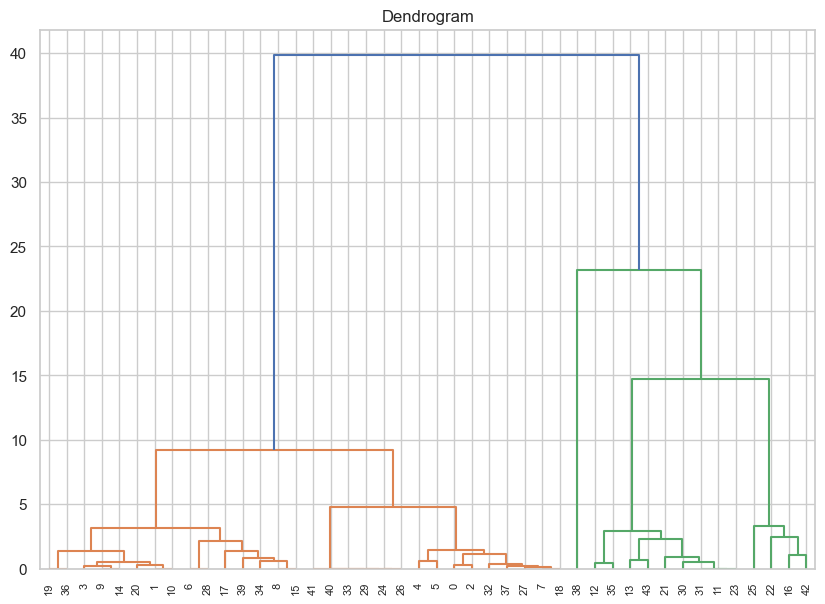

In [155]:
#Dendrogram plot
plt.figure(figsize =(10,7))
plt.title('Dendrogram')

linkage_method = linkage(segment_data1, method ='ward', metric='euclidean')
Dendrogram = dendrogram(linkage_method);

In [204]:
# Data source: Healthy Lifestyle Cities Report 2021 from https://www.lenstore.co.uk/research/healthy-lifestyle-report/